<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

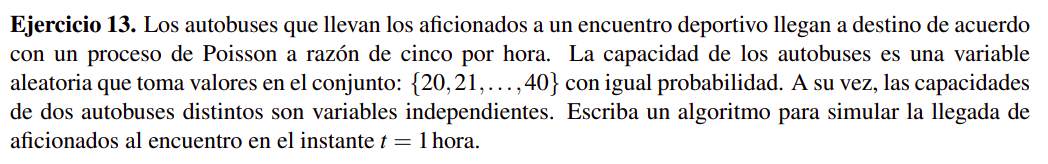

In [96]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUMERO_DE_MUESTRAS = 100_000
X_MIN, X_MAX = -20, 20
DOMINIO = np.linspace(X_MIN, X_MAX, 1000)

TASA_LAMBDA = 5
TIEMPO_TOTAL = 1

def generar_tiempo_exponencial(tasa_lambda=TASA_LAMBDA):
    return -np.log(1 - random()) / tasa_lambda

def generar_eventos_poisson(tasa_lambda=TASA_LAMBDA, tiempo_total=TIEMPO_TOTAL):
    tiempos_eventos = []
    tiempo_actual = generar_tiempo_exponencial(tasa_lambda)

    while tiempo_actual <= tiempo_total:
        tiempos_eventos.append(tiempo_actual)
        tiempo_actual += generar_tiempo_exponencial(tasa_lambda)

    return tiempos_eventos

def N(t=TIEMPO_TOTAL, tasa_lambda=TASA_LAMBDA):
    return len(generar_eventos_poisson(tasa_lambda, t))

def generar_aficionados_hasta_t(t=TIEMPO_TOTAL):
    return sum([int(20 + random()*20) for _ in range(N(t))])

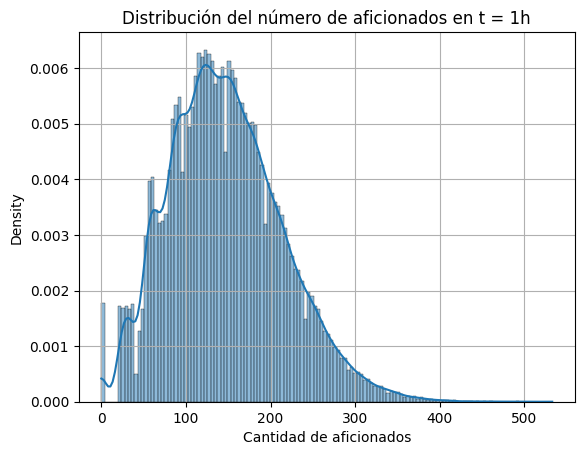

In [101]:
muestras = [generar_aficionados_hasta_t() for _ in range(NUMERO_DE_MUESTRAS)]

#@title { vertical-output: true}
# sns.lineplot(x=DOMINIO, y=f_cauchy(DOMINIO), label="f(x)", color="red")
sns.histplot(muestras, kde=True, stat='density')
plt.title(f"Distribución del número de aficionados en t = {TIEMPO_TOTAL}h")
plt.xlabel("Cantidad de aficionados")
plt.grid(True)
plt.show()
